In [92]:
pip install catboost


In [93]:
from catboost import CatBoostRegressor

In [94]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import math
from IPython.display import display
from sklearn.model_selection import train_test_split, GridSearchCV

#from brokenaxes import brokenaxes
from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings
warnings.filterwarnings('ignore')

In [95]:
data = pd.read_csv('/content/_All_Cities_Cleaned.csv')


In [96]:
data = data.dropna()

In [97]:
data.shape

(23106, 10)

In [98]:
data = data.astype({"seller_type":"str","bedroom":"int64","layout_type":"str","property_type":"str","locality":"str","price":"int64","area":"int64","furnish_type":"str","bathroom":"int64","city":"str"})

In [99]:
data = data.drop_duplicates()

In [100]:
# Data Exploration

In [101]:
data.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,1,RK,Studio Apartment,Richards Town,3000,150,Semi-Furnished,0,Bangalore
2,OWNER,1,BHK,Apartment,Shivaji Nagar,10000,700,Semi-Furnished,0,Bangalore
3,AGENT,4,BHK,Independent House,hebbal kempapura,1,2800,Semi-Furnished,0,Bangalore
4,AGENT,2,BHK,Apartment,NRI Layout,18000,1200,Semi-Furnished,0,Bangalore
5,AGENT,2,BHK,Apartment,Whitefield,20000,1150,Semi-Furnished,0,Bangalore


In [102]:
data.describe()

,bedroom,price,area,bathroom
count,13965.000000,13965.000000,13965.000000,13965.000000
mean,1.979663,19934.408879,1160.659649,1.878912
std,0.857350,13242.898936,712.337124,0.885780
min,1.000000,1.000000,100.000000,0.000000
25%,1.000000,11000.000000,700.000000,1.000000
50%,2.000000,16500.000000,1100.000000,2.000000
75%,2.000000,25000.000000,1370.000000,2.000000
max,15.000000,99000.000000,10800.000000,19.000000


In [103]:
target = 'price'
features = list(set(data.columns) - set(target))
features

['seller_type',
 'locality',
 'bathroom',
 'layout_type',
 'city',
 'price',
 'property_type',
 'furnish_type',
 'bedroom',
 'area']

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13965 entries, 0 to 23100
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   seller_type    13965 non-null  object
 1   bedroom        13965 non-null  int64 
 2   layout_type    13965 non-null  object
 3   property_type  13965 non-null  object
 4   locality       13965 non-null  object
 5   price          13965 non-null  int64 
 6   area           13965 non-null  int64 
 7   furnish_type   13965 non-null  object
 8   bathroom       13965 non-null  int64 
 9   city           13965 non-null  object
dtypes: int64(4), object(6)
memory usage: 1.2+ MB


In [105]:
data.nunique().sort_values()

,0
city,1
layout_type,2
seller_type,3
furnish_type,3
property_type,6
bedroom,10
bathroom,12
price,563
locality,876
area,1130


In [106]:
display(data.describe())

,bedroom,price,area,bathroom
count,13965.000000,13965.000000,13965.000000,13965.000000
mean,1.979663,19934.408879,1160.659649,1.878912
std,0.857350,13242.898936,712.337124,0.885780
min,1.000000,1.000000,100.000000,0.000000
25%,1.000000,11000.000000,700.000000,1.000000
50%,2.000000,16500.000000,1100.000000,2.000000
75%,2.000000,25000.000000,1370.000000,2.000000
max,15.000000,99000.000000,10800.000000,19.000000


In [107]:
nu = data[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(data[features].shape[1]):
    if nu.values[i]<=16:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 3 numerical & 7 categorical features.


In [108]:
# EDA

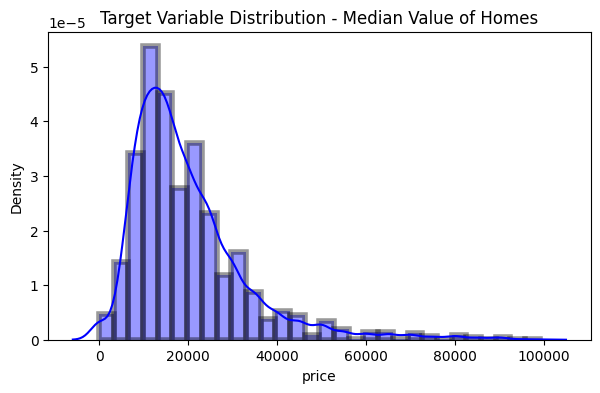

In [109]:
plt.figure(figsize=[7,4])
sns.distplot(data[target], color='b',hist_kws=dict(edgecolor="black", linewidth=4), bins=30)
plt.title('Target Variable Distribution - Median Value of Homes')
plt.show()

In [110]:
cf

['city',
 'layout_type',
 'seller_type',
 'furnish_type',
 'property_type',
 'bedroom',
 'bathroom']

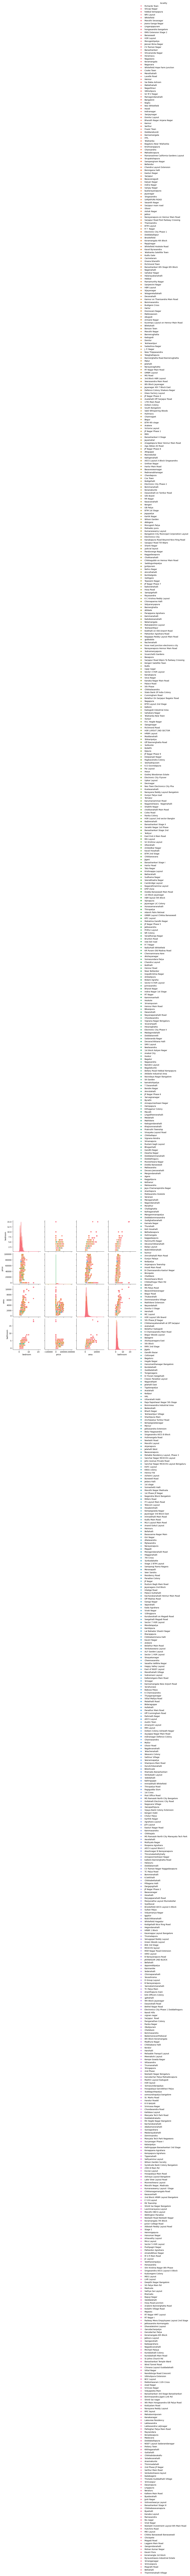

In [111]:
sns.pairplot(data, hue='locality', diag_kind='kde', markers=['o', 's', 'D'], palette='husl')
plt.show()

In [112]:
# Data preprocessing

In [113]:
data.drop_duplicates(inplace=True)

In [114]:
data.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,1,RK,Studio Apartment,Richards Town,3000,150,Semi-Furnished,0,Bangalore
2,OWNER,1,BHK,Apartment,Shivaji Nagar,10000,700,Semi-Furnished,0,Bangalore
3,AGENT,4,BHK,Independent House,hebbal kempapura,1,2800,Semi-Furnished,0,Bangalore
4,AGENT,2,BHK,Apartment,NRI Layout,18000,1200,Semi-Furnished,0,Bangalore
5,AGENT,2,BHK,Apartment,Whitefield,20000,1150,Semi-Furnished,0,Bangalore


In [115]:
data.isnull().sum().sort_values()

,0
seller_type,0
bedroom,0
layout_type,0
property_type,0
locality,0
price,0
area,0
furnish_type,0
bathroom,0
city,0


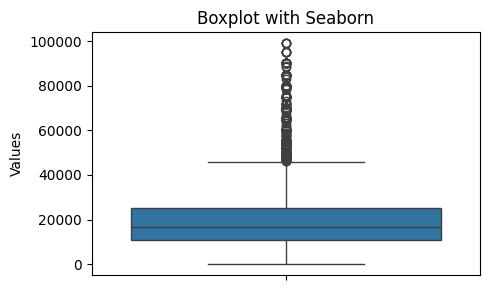

In [116]:
# Create boxplot
plt.figure(figsize=[5,3])
sns.boxplot(data=data['price'])
# Add labels and title
plt.title('Boxplot with Seaborn')
plt.ylabel('Values')
plt.tight_layout()
# Display the plot
plt.show()

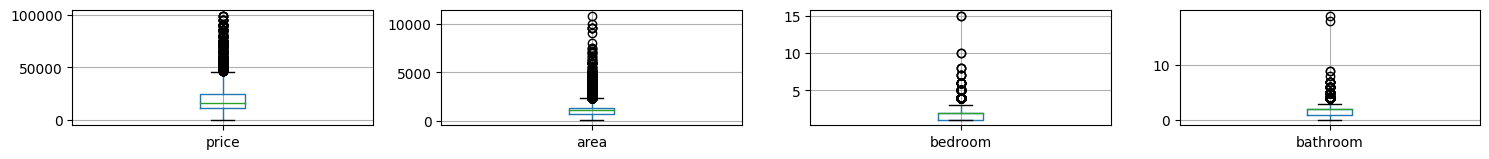

In [117]:
nf = ["price","area","bedroom","bathroom"]
n = 4
plt.figure(figsize=[15,3*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    data.boxplot(nf[i])
plt.tight_layout()
plt.show()

In [118]:
## Data preprocessing

In [119]:
#Removal of outlier:

In [120]:
nf = ["price","area","bedroom","bathroom"]

In [121]:
df3 = data.copy()
for i in nf:
    Q1 = df3[i].quantile(0.25)
    Q3 = df3[i].quantile(0.75)
    IQR = Q3 - Q1
    print(i,Q1,Q3,IQR)
    df3 = df3[df3[i] <= (Q3+(1.5*IQR))]
    df3 = df3[df3[i] >= (Q1-(1.5*IQR))]

    df3 = df3.reset_index(drop=True)
display(df3.head())
display(df3.shape)

price 11000.0 25000.0 14000.0
area 650.0 1300.0 650.0
bedroom 1.0 2.0 1.0
bathroom 1.0 2.0 1.0


,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,1,RK,Studio Apartment,Richards Town,3000,150,Semi-Furnished,0,Bangalore
1,OWNER,1,BHK,Apartment,Shivaji Nagar,10000,700,Semi-Furnished,0,Bangalore
2,AGENT,2,BHK,Apartment,NRI Layout,18000,1200,Semi-Furnished,0,Bangalore
3,AGENT,2,BHK,Apartment,Whitefield,20000,1150,Semi-Furnished,0,Bangalore
4,AGENT,1,RK,Studio Apartment,Maruthi Sevanagar,6500,300,Semi-Furnished,0,Bangalore


(12783, 10)

In [122]:
# Data manipulation

In [123]:
display(df3.describe())

,bedroom,price,area,bathroom
count,12783.000000,12783.000000,12783.000000,12783.000000
mean,1.843620,17759.236955,1015.287100,1.726434
std,0.702745,8755.212560,415.576365,0.671895
min,1.000000,1.000000,100.000000,0.000000
25%,1.000000,11000.000000,650.000000,1.000000
50%,2.000000,16000.000000,1050.000000,2.000000
75%,2.000000,23000.000000,1265.000000,2.000000
max,3.000000,46000.000000,2250.000000,3.000000


                                       Correlation Matrix                                       


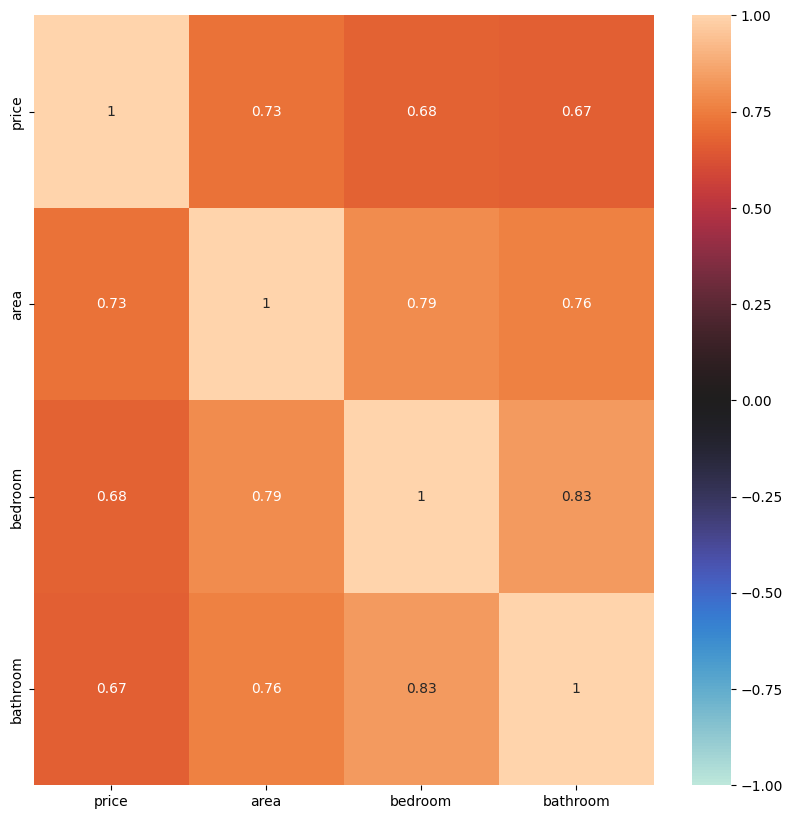

In [124]:
#Checking the correlation

print('\033[1mCorrelation Matrix'.center(100))
plt.figure(figsize=[10,10])
sns.heatmap(df3[nf].corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()

In [125]:
df3[nf].corr()

,price,area,bedroom,bathroom
price,1.000000,0.726544,0.676000,0.668269
area,0.726544,1.000000,0.794573,0.762493
bedroom,0.676000,0.794573,1.000000,0.828485
bathroom,0.668269,0.762493,0.828485,1.000000


In [126]:
data = df3

In [127]:
features = list(set(data.columns) - {'price'})
target = ['price']

In [128]:
X = data[features]
y = data[target]

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [130]:
X_train.head()

,seller_type,locality,layout_type,bathroom,city,property_type,furnish_type,bedroom,area
11361,AGENT,Banashankari,BHK,1,Bangalore,Apartment,Unfurnished,2,800
7182,OWNER,Bommanahalli,BHK,2,Bangalore,Apartment,Semi-Furnished,3,1620
1090,AGENT,Marathahalli,BHK,3,Bangalore,Apartment,Semi-Furnished,3,1950
35,AGENT,Cox Town,BHK,3,Bangalore,Apartment,Semi-Furnished,3,1650
2619,AGENT,JP Nagar Phase 7,BHK,2,Bangalore,Independent House,Semi-Furnished,2,750


In [131]:
# Initialize CatBoost Regressor
model = CatBoostRegressor(iterations=1000, learning_rate=0.05, depth=10, loss_function='RMSE')  # Show progress every 200 iterations

# Train the model
model.fit(X_train, y_train,cat_features=features,verbose=False)

In [132]:
# Define hyperparameters to tune
param_grid = {
    'iterations': [100, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 10]
}

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train,cat_features=features)

# Get the best model
best_model = grid_search.best_estimator_


Streaming output truncated to the last 5000 lines.
500:	learn: 2429.8563745	total: 24.5s	remaining: 24.4s
501:	learn: 2426.4039441	total: 24.6s	remaining: 24.4s
502:	learn: 2421.8592140	total: 24.7s	remaining: 24.4s
503:	learn: 2419.5984045	total: 24.8s	remaining: 24.4s
504:	learn: 2415.7111386	total: 24.8s	remaining: 24.4s
505:	learn: 2413.1487857	total: 24.9s	remaining: 24.3s
506:	learn: 2410.9522474	total: 25s	remaining: 24.3s
507:	learn: 2409.8535218	total: 25.1s	remaining: 24.3s
508:	learn: 2407.2246858	total: 25.1s	remaining: 24.2s
509:	learn: 2405.4592455	total: 25.2s	remaining: 24.2s
510:	learn: 2401.1169178	total: 25.2s	remaining: 24.1s
511:	learn: 2398.2866980	total: 25.3s	remaining: 24.1s
512:	learn: 2396.8369450	total: 25.3s	remaining: 24s
513:	learn: 2395.4154899	total: 25.4s	remaining: 24s
514:	learn: 2392.3533621	total: 25.4s	remaining: 23.9s
515:	learn: 2390.5827972	total: 25.5s	remaining: 23.9s
516:	learn: 2389.2490302	total: 25.5s	remaining: 23.8s
517:	learn: 2387.301

In [133]:
y_pred = np.abs(np.ceil(model.predict(X_test)))

In [134]:
# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

4602.605249462252

In [135]:
# Calculate R² score
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')


R² Score: 0.7202523133555478


In [136]:
y_test = y_test.reset_index()
X_test = X_test.reset_index()
prediction_dataset = pd.concat([X_test,y_test],axis=1)

In [137]:
y_pred= pd.DataFrame(y_pred,columns=["pred"])
#print(y_pred)
prediction_dataset = pd.concat([prediction_dataset,y_pred],axis=1)
prediction_dataset

,index,seller_type,locality,layout_type,bathroom,city,property_type,furnish_type,bedroom,area,index,price,pred
0,9947,AGENT,CV Raman Nagar,BHK,1,Bangalore,Apartment,Semi-Furnished,2,1350,9947,20000,20084.0
1,2002,AGENT,Mahadevapura,BHK,2,Bangalore,Apartment,Semi-Furnished,1,1200,2002,14900,21921.0
2,3045,AGENT,Electronic City Phase 1,BHK,2,Bangalore,Apartment,Semi-Furnished,3,1410,3045,23000,21676.0
3,2124,AGENT,Kodigehalli,BHK,2,Bangalore,Independent Floor,Semi-Furnished,2,1200,2124,20000,19456.0
4,12326,OWNER,Banashankari,BHK,1,Bangalore,Independent Floor,Semi-Furnished,1,550,12326,8400,9553.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,12285,OWNER,New Thippasandra,BHK,1,Bangalore,Independent Floor,Semi-Furnished,1,450,12285,8700,9688.0
1914,10172,OWNER,Koralur,BHK,1,Bangalore,Apartment,Semi-Furnished,1,500,10172,6000,7677.0
1915,6518,OWNER,Kalyan Nagar,BHK,2,Bangalore,Independent Floor,Semi-Furnished,2,1000,6518,20000,18045.0
1916,756,AGENT,Indira Nagar,BHK,3,Bangalore,Apartment,Semi-Furnished,3,1750,756,35000,36969.0


In [138]:
prediction_dataset.to_csv("Actual with predicted_new.csv",index=False)